# Visualization of the Tifinag-MNIST database using the T-SNE algorithm

## The libraries we will use

In [ ]:
import time
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and adaptation

In [ ]:
def upload_data(path_name, number_of_class, number_of_images): 
    X_Data = []
    Y_Data = []
    for i in range(number_of_class):
        images = os.listdir(path_name + str(i))
        for j in range(number_of_images):
            img = cv2.imread(path_name + str(i)+ '/' + images[j], 0)
            X_Data.append(img)
            Y_Data.append(i)
        print("> the " + str(i) + "-th file is successfully uploaded.", end='\r') 
    return np.array(X_Data), np.array(Y_Data)

n_class = 33
n_train = 2000

x_data, y_data = upload_data('/media/etabook/etadisk1/EducFils/PFE/DATA2/train_data/', n_class, n_train)

x_data = x_data.astype('float32')
x_data = np.reshape(x_data, (x_data.shape[0], 28*28))
x_data /= 255
print('x_data shape:', x_data.shape)
print(x_data.shape[0], 'data samples')

x_data shape: (66000, 784)sfully uploaded.
66000 data samples


## Convert images and label vector to a Pandas DataFrame

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(x_data.shape[1]) ]
df = pd.DataFrame(x_data,columns=feat_cols)
df['y'] = y_data
df['label'] = df['y'].apply(lambda i: str(i))
x_data, y_data = None, None
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (66000, 786)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.121569,0.062745,0.066667,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,...,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.062745,0.121569,0,0
1,0.121569,0.062745,0.066667,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,...,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.062745,0.121569,0,0
2,0.121569,0.062745,0.066667,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,...,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.062745,0.121569,0,0
3,0.054902,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.054902,0,0
4,0.054902,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.054902,0,0


## Displaying images from the Dataframe

<Figure size 432x288 with 0 Axes>

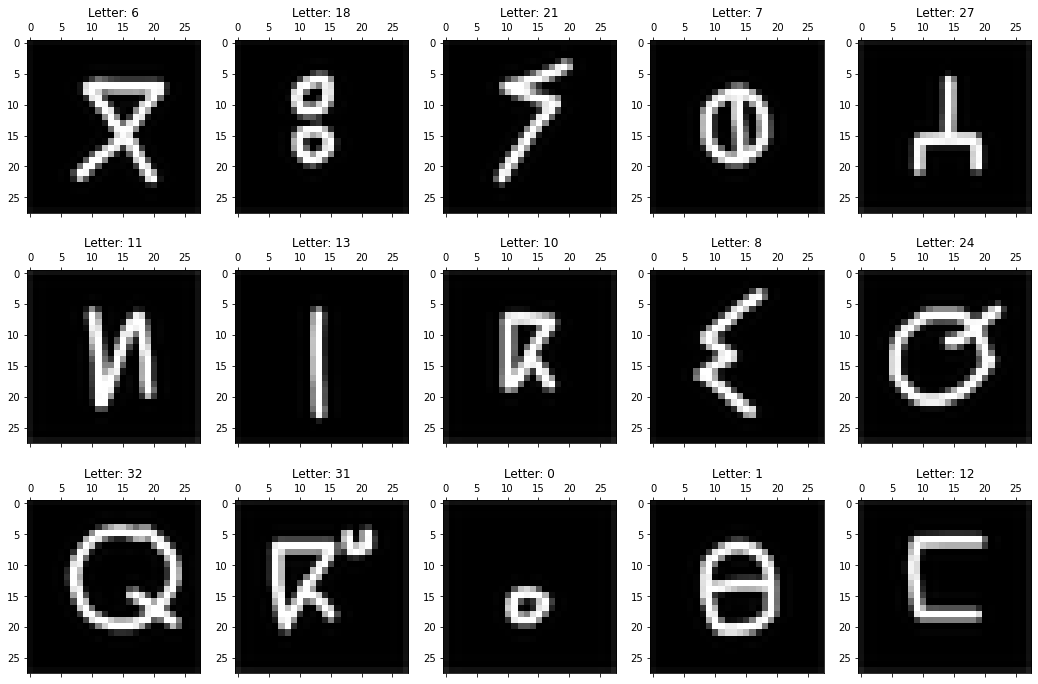

In [ ]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(18,12) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Letter: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## Launch of the T-SNE algorithm



In [ ]:
N = 50000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/etabook/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/etabook/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.031s...
[t-SNE] Computed neighbors for 50000 samples in 166.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for 

## Visualisation

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

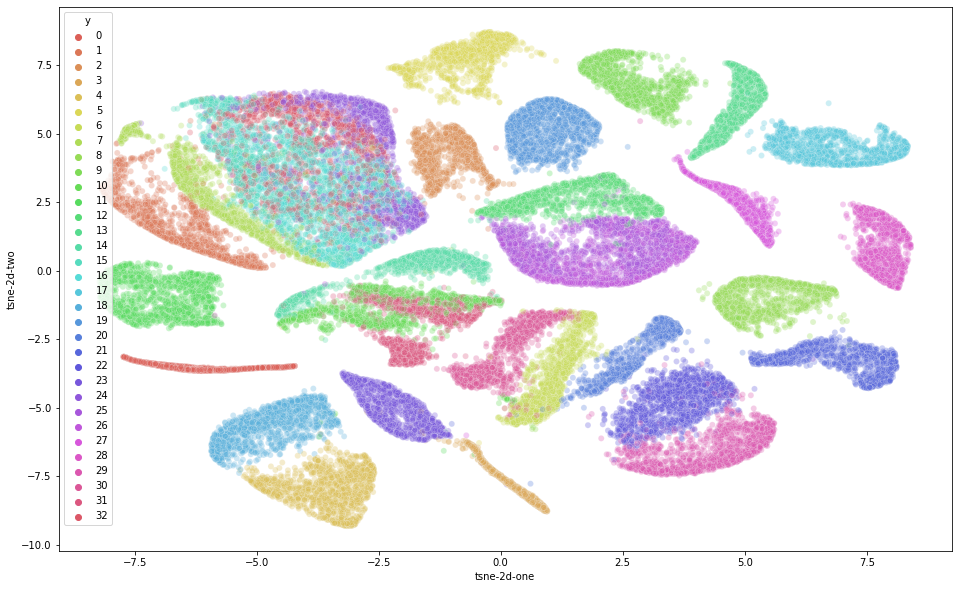

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 33),
    data=df_subset,
    legend="full",
    alpha=0.3
)